In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
df = pd.read_csv('GHG:Hash.csv')
df = df[:4429]
df

,Date and Time,Hash Rate,"Estimated, MtCO2e",GHG/Hash,Power Consumption (GW)
0,2010-07-18,1.552225e-03,0.000119,7.666413e-02,0.000214
1,2010-07-19,1.570274e-03,0.000119,7.578293e-02,0.000215
2,2010-07-20,1.633446e-03,0.000121,7.407650e-02,0.000219
3,2010-07-21,1.868085e-03,0.000127,6.798405e-02,0.000229
4,2010-07-22,1.588324e-03,0.000126,7.932892e-02,0.000227
...,...,...,...,...,...
4424,2022-08-28,2.269079e+08,49.305006,2.172910e-07,97.303928
4425,2022-08-29,2.212705e+08,49.694708,2.245880e-07,98.073009
4426,2022-08-30,2.283173e+08,48.944166,2.143690e-07,96.591807
4427,2022-08-31,2.205152e+08,49.126427,2.227800e-07,96.951501


In [5]:
df['GHG_log_log'] = np.log(df['GHG/Hash'])
df

,Date and Time,Hash Rate,"Estimated, MtCO2e",GHG/Hash,Power Consumption (GW),GHG_log_log
0,2010-07-18,1.552225e-03,0.000119,7.666413e-02,0.000214,-2.568321
1,2010-07-19,1.570274e-03,0.000119,7.578293e-02,0.000215,-2.579882
2,2010-07-20,1.633446e-03,0.000121,7.407650e-02,0.000219,-2.602657
3,2010-07-21,1.868085e-03,0.000127,6.798405e-02,0.000229,-2.688482
4,2010-07-22,1.588324e-03,0.000126,7.932892e-02,0.000227,-2.534152
...,...,...,...,...,...,...
4424,2022-08-28,2.269079e+08,49.305006,2.172910e-07,97.303928,-15.342028
4425,2022-08-29,2.212705e+08,49.694708,2.245880e-07,98.073009,-15.308998
4426,2022-08-30,2.283173e+08,48.944166,2.143690e-07,96.591807,-15.355567
4427,2022-08-31,2.205152e+08,49.126427,2.227800e-07,96.951501,-15.317081


In [6]:
def log_function(x, a, b):
    return a * np.log(x) + b
    
x_data = np.array(df.index + 1)
print(x_data)
y_data = np.array(df['GHG/Hash'])
print(y_data)

[   1    2    3 ... 4427 4428 4429]
[7.6664127e-02 7.5782930e-02 7.4076504e-02 ... 2.1436900e-07 2.2278000e-07
 2.2812300e-07]


a: -3.7089795958646805, b: 16.142371300982827


/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_10826/412840141.py:17: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


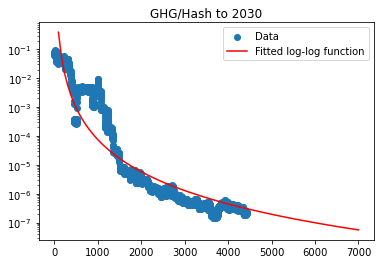

In [7]:
log_y_data = np.log(y_data)

# Fit the logarithm of y_data to the logarithmic function
params, _ = curve_fit(log_function, x_data, log_y_data)

# Print the best-fit parameters
a, b = params
print(f"a: {a}, b: {b}")

# Plot the original data and the fitted logarithmic function
plt.scatter(x_data, y_data, label="Data")
x_fit = np.linspace(100, 7000, 100) #Around 2030
y_fit = np.exp(log_function(x_fit, a, b))  # Inverse transform to the original scale
plt.plot(x_fit, y_fit, label="Fitted log-log function", color="r")
plt.legend()
plt.title('GHG/Hash to 2030')
plt.yscale('Log')
plt.show()

In [8]:
print(len(y_fit))

100


In [9]:
#Adding dates to graph
t = pd.date_range(start='2010-07-18',
                  end='2040-01-01',
                  periods=100)
print(len(y_data))
t2 = pd.date_range(start='2010-07-18',
                  end='2022-09-01',
                  periods=len(y_data))

4429


/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_10826/2466345279.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


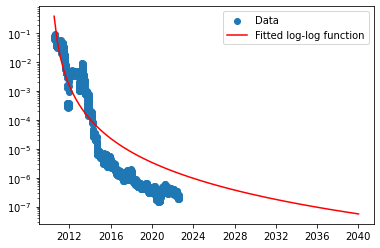

In [10]:
#Seems like adding the fit distorts the data. FIX THIS!
plt.scatter(t2, y_data, label="Data")
plt.plot(t, y_fit, label="Fitted log-log function", color="r")
plt.legend()
plt.yscale('Log')
plt.show()